In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('alz.csv')
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [2]:
df.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

In [3]:
df.loc[(df["Gender"]=="Male") & (df["Age"]<=60),"Age_Gaps"] ="50s_male"
df.loc[(df["Gender"]=="Male") & (df["Age"]>60) & (df["Age"]<=70),"Age_Gaps"] = "60s_male"
df.loc[(df["Gender"]=="Male") & (df["Age"]>70) & (df["Age"]<=80),"Age_Gaps"] = "70s_male"
df.loc[(df["Gender"]=="Male") & (df["Age"]>80) & (df["Age"]<=90),"Age_Gaps"] = "80s_male"
df.loc[(df["Gender"]=="Male") & (df["Age"]>90),"Age_Gaps"] ="90s_male"


df.loc[(df["Gender"]=="Female") & (df["Age"]<=60),"Age_Gaps"] ="50s_Female"
df.loc[(df["Gender"]=="Female") & (df["Age"]>60) & (df["Age"]<=70),"Age_Gaps"] = "60s_Female"
df.loc[(df["Gender"]=="Female") & (df["Age"]>70) & (df["Age"]<=80),"Age_Gaps"] = "70s_Female"
df.loc[(df["Gender"]=="Female") & (df["Age"]>80) & (df["Age"]<=90),"Age_Gaps"] = "80s_Female"
df.loc[(df["Gender"]=="Female") & (df["Age"]>90),"Age_Gaps"] ="90s_Female"


In [4]:
df

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis,Age_Gaps
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,High,Retired,Single,No,Low,Medium,High,Urban,No,80s_male
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No,70s_male
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Medium,Employed,Single,No,Low,Medium,High,Rural,No,80s_Female
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Medium,Retired,Single,No,High,Medium,Low,Rural,No,50s_male
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,High,Employed,Married,No,Low,Medium,High,Rural,No,50s_Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,Female,3,22.6,High,Former,Never,No,No,...,High,Unemployed,Widowed,No,Medium,High,Medium,Rural,No,50s_Female
74279,UK,58,Male,18,30.6,Low,Never,Occasionally,Yes,No,...,Medium,Unemployed,Single,No,Medium,High,High,Rural,No,50s_male
74280,Spain,57,Female,13,28.2,Medium,Never,Regularly,No,No,...,Low,Employed,Single,Yes,High,Low,Low,Rural,No,50s_Female
74281,Brazil,73,Female,7,29.0,Low,Never,Regularly,No,No,...,Low,Employed,Widowed,No,Low,Low,High,Rural,No,70s_Female


In [5]:
df["Age_Gaps"].isnull().sum()

0

In [6]:
df["Age_BMI"] = df["Age"]*df["BMI"]

In [7]:
def grab_cols(df):
    num_cols = list(df.select_dtypes(include="number"))
    cat_cols = [col for col in df.columns if col not in num_cols]
    num_but_cat = [col for col in num_cols if df[col].nunique()<25]
    cat_but_car = [col for col in cat_cols if df[col].nunique() >25]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"cat_cols = {cat_cols}")
    print(f"num_cols = {num_cols}")
    print(f"num_but_cat = {num_but_cat}")
    print(f"cat_but_car= {cat_but_car}")
    return cat_cols,num_cols,cat_but_car,num_but_cat
cat_cols,num_cols,cat_but_car,num_but_cat = grab_cols(df)

cat_cols = ['Country', 'Gender', 'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Diabetes', 'Hypertension', 'Cholesterol Level', 'Family History of Alzheimer’s', 'Depression Level', 'Sleep Quality', 'Dietary Habits', 'Air Pollution Exposure', 'Employment Status', 'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level', 'Income Level', 'Stress Levels', 'Urban vs Rural Living', 'Alzheimer’s Diagnosis', 'Age_Gaps', 'Education Level']
num_cols = ['Age', 'BMI', 'Cognitive Test Score', 'Age_BMI']
num_but_cat = ['Education Level']
cat_but_car= []


In [8]:
df["Cholesterol Level"] = df["Cholesterol Level"].map({"Normal": 0, "High": 1})

In [10]:
from sklearn.preprocessing import LabelEncoder
binary_cols = ['Gender',
 'Diabetes',
 'Hypertension',
 'Family History of Alzheimer’s',
 'Genetic Risk Factor (APOE-ε4 allele)',
 'Urban vs Rural Living',
 'Alzheimer’s Diagnosis']
def label_encoder(df, col):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Column: {col} -> {mapping}")
    

for c in binary_cols:
    label_encoder(df, c)

Column: Gender -> {'Female': 0, 'Male': 1}
Column: Diabetes -> {'No': 0, 'Yes': 1}
Column: Hypertension -> {'No': 0, 'Yes': 1}
Column: Family History of Alzheimer’s -> {'No': 0, 'Yes': 1}
Column: Genetic Risk Factor (APOE-ε4 allele) -> {'No': 0, 'Yes': 1}
Column: Urban vs Rural Living -> {'Rural': 0, 'Urban': 1}
Column: Alzheimer’s Diagnosis -> {'No': 0, 'Yes': 1}


In [11]:
ordinal_cols = [
 'Physical Activity Level',
 'Depression Level',
 'Sleep Quality',
 'Dietary Habits',
 'Air Pollution Exposure',
 'Social Engagement Level',
 'Income Level',
 'Stress Levels']

df['Physical Activity Level'] = df['Physical Activity Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Depression Level'] = df['Depression Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Sleep Quality'] = df['Sleep Quality'].map({'Poor': 0, 'Average': 1, 'Good': 2})
df['Dietary Habits'] = df['Dietary Habits'].map({'Unhealthy': 0, 'Average': 1, 'Healthy': 2})
df['Air Pollution Exposure'] = df['Air Pollution Exposure'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Social Engagement Level'] = df['Social Engagement Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Income Level'] = df['Income Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Stress Levels'] = df['Stress Levels'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [12]:
df.select_dtypes(exclude="number")

,Country,Smoking Status,Alcohol Consumption,Employment Status,Marital Status,Age_Gaps
0,Spain,Never,Occasionally,Retired,Single,80s_male
1,Argentina,Former,Never,Unemployed,Widowed,70s_male
2,South Africa,Current,Occasionally,Employed,Single,80s_Female
3,China,Never,Regularly,Retired,Single,50s_male
4,Sweden,Former,Never,Employed,Married,50s_Female
...,...,...,...,...,...,...
74278,Russia,Former,Never,Unemployed,Widowed,50s_Female
74279,UK,Never,Occasionally,Unemployed,Single,50s_male
74280,Spain,Never,Regularly,Employed,Single,50s_Female
74281,Brazil,Never,Regularly,Employed,Widowed,70s_Female


In [13]:
ohe_cols = ['Country',
 'Smoking Status',
 'Alcohol Consumption',
 'Employment Status',
 'Marital Status',
 'Age_Gaps']

In [14]:
def ohe(dataframe,ohe_cols):
    dataframe = pd.get_dummies(dataframe,columns=ohe_cols,drop_first=False,dtype=int)
    return dataframe

df_test = ohe(df,ohe_cols)

df_test

,Age,Gender,Education Level,BMI,Physical Activity Level,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,...,Age_Gaps_50s_Female,Age_Gaps_50s_male,Age_Gaps_60s_Female,Age_Gaps_60s_male,Age_Gaps_70s_Female,Age_Gaps_70s_male,Age_Gaps_80s_Female,Age_Gaps_80s_male,Age_Gaps_90s_Female,Age_Gaps_90s_male
0,90,1,1,33.0,1,0,0,0,0,90,...,0,0,0,0,0,0,0,1,0,0
1,72,1,7,29.9,1,0,0,0,0,65,...,0,0,0,0,0,1,0,0,0,0
2,86,0,19,22.9,2,0,1,0,0,43,...,0,0,0,0,0,0,1,0,0,0
3,53,1,17,31.2,0,1,0,0,0,81,...,0,1,0,0,0,0,0,0,0,0
4,58,0,3,30.0,2,1,0,0,0,49,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,60,0,3,22.6,2,0,0,1,0,42,...,1,0,0,0,0,0,0,0,0,0
74279,58,1,18,30.6,0,1,0,0,0,42,...,0,1,0,0,0,0,0,0,0,0
74280,57,0,13,28.2,1,0,0,1,1,61,...,1,0,0,0,0,0,0,0,0,0
74281,73,0,7,29.0,0,0,0,1,0,97,...,0,0,0,0,1,0,0,0,0,0


In [15]:
X = df_test.drop(columns='Alzheimer’s Diagnosis')
y = df_test['Alzheimer’s Diagnosis']

In [16]:
from sklearn.feature_selection import mutual_info_classif

discrete_mask = []
for col in X.columns:
    # Örnek bir mantık: eğer sütunda unique değer sayısı 10’dan azsa kategorik (True),
    # yoksa sayısal (False). Ya da dtype kontrolü yapabilirsiniz.
    if X[col].nunique() < 21:
        discrete_mask.append(True)
    else:
        discrete_mask.append(False)

mi_scores = mutual_info_classif(X, y, discrete_features=discrete_mask)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
mi_series

Age                                     1.091206e-01
Age_BMI                                 8.811157e-02
Age_Gaps_50s_male                       2.147071e-02
Age_Gaps_50s_Female                     2.078007e-02
Genetic Risk Factor (APOE-ε4 allele)    1.866059e-02
                                            ...     
Country_South Korea                     6.296825e-07
Marital Status_Single                   6.250735e-07
Employment Status_Unemployed            2.337174e-07
Marital Status_Widowed                  7.594773e-08
Country_Saudi Arabia                    6.758704e-08
Length: 62, dtype: float64

/var/folders/80/9ytsrtbj0bgbwgqlkgw86mdc0000gn/T/ipykernel_2003/983555239.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_mi.values, y=top_20_mi.index, palette='rocket')


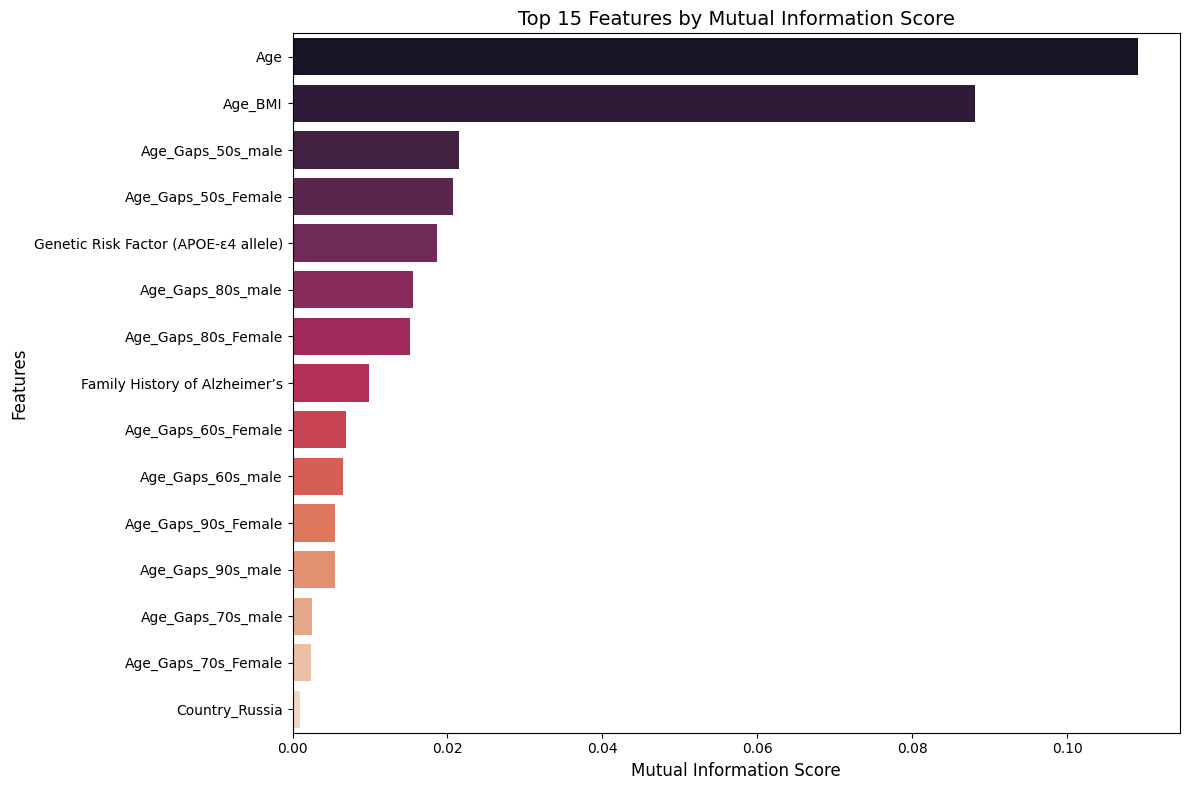

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# İlk 20 özelliği alalım
top_20_mi = mi_series.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_mi.values, y=top_20_mi.index, palette='rocket')

plt.title('Top 15 Features by Mutual Information Score', fontsize=14)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=10,n_estimators=200,max_depth=6)

model.fit(X, y)

importances = model.feature_importances_
importance_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)
importance_series

Age                                     0.422616
Age_BMI                                 0.112760
Genetic Risk Factor (APOE-ε4 allele)    0.094934
Age_Gaps_50s_male                       0.063956
Age_Gaps_50s_Female                     0.059052
                                          ...   
Country_Saudi Arabia                    0.000108
Country_France                          0.000105
Country_Spain                           0.000103
Country_South Korea                     0.000093
Country_Germany                         0.000067
Length: 62, dtype: float64

/var/folders/80/9ytsrtbj0bgbwgqlkgw86mdc0000gn/T/ipykernel_2003/2917217740.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_features.values, y=top_20_features.index, palette='mako')


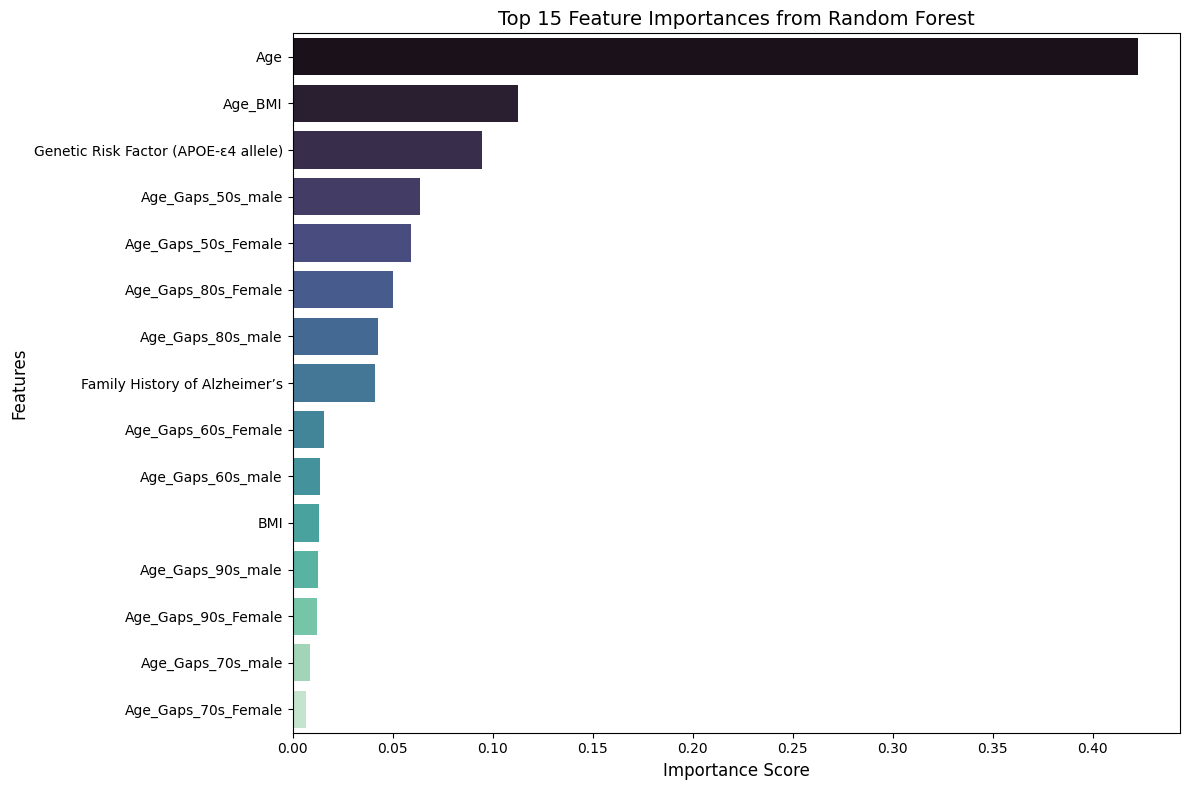

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# İlk 20 özelliği alalım
top_20_features = importance_series.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_features.values, y=top_20_features.index, palette='mako')

plt.title('Top 15 Feature Importances from Random Forest', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

In [20]:
creamer_cols = [col for col in df_test.columns if df_test[col].nunique() < 21]
creamer_cols

['Gender',
 'Education Level',
 'Physical Activity Level',
 'Diabetes',
 'Hypertension',
 'Cholesterol Level',
 'Family History of Alzheimer’s',
 'Depression Level',
 'Sleep Quality',
 'Dietary Habits',
 'Air Pollution Exposure',
 'Genetic Risk Factor (APOE-ε4 allele)',
 'Social Engagement Level',
 'Income Level',
 'Stress Levels',
 'Urban vs Rural Living',
 'Alzheimer’s Diagnosis',
 'Country_Argentina',
 'Country_Australia',
 'Country_Brazil',
 'Country_Canada',
 'Country_China',
 'Country_France',
 'Country_Germany',
 'Country_India',
 'Country_Italy',
 'Country_Japan',
 'Country_Mexico',
 'Country_Norway',
 'Country_Russia',
 'Country_Saudi Arabia',
 'Country_South Africa',
 'Country_South Korea',
 'Country_Spain',
 'Country_Sweden',
 'Country_UK',
 'Country_USA',
 'Smoking Status_Current',
 'Smoking Status_Former',
 'Smoking Status_Never',
 'Alcohol Consumption_Never',
 'Alcohol Consumption_Occasionally',
 'Alcohol Consumption_Regularly',
 'Employment Status_Employed',
 'Employment

In [21]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    """
    İki kategorik değişken arasındaki ilişkinin etki büyüklüğünü (effect size)
    0-1 arası bir skor ile ifade eden Cramér’s V değerini hesaplar.
    """
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

def calc_cramers_v_scores(df, target_col, feature_cols):
    
    cramers_results = []
    
    for col in feature_cols:
        confusion = pd.crosstab(df[col], df[target_col])
        
        # Eğer sütun veya hedef sadece tek kategoriden oluşuyorsa Cramér’s V hesaplanamaz
        if confusion.shape[0] < 2 or confusion.shape[1] < 2:
            cv = np.nan
        else:
            cv = cramers_v(confusion)
        
        cramers_results.append((col, cv))
    
    df_cramers = pd.DataFrame(cramers_results, columns=["feature", "cramers_v"])
    df_cramers.sort_values("cramers_v", ascending=False, inplace=True)
    df_cramers.reset_index(drop=True, inplace=True)
    
    return df_cramers

In [22]:
# Örnek DataFrame: df
# Hedef sütun: "Alzheimer’s Diagnosis"

target_col = "Alzheimer’s Diagnosis"

creamer_cols2 = [col for col in creamer_cols if col != target_col]
# Fonksiyonu çağır
df_cramers = calc_cramers_v_scores(df_test, target_col, creamer_cols2)

# Sonucu inceleyin:
print(df_cramers)

                                 feature  cramers_v
0                      Age_Gaps_50s_male   0.195934
1   Genetic Risk Factor (APOE-ε4 allele)   0.194450
2                    Age_Gaps_50s_Female   0.192975
3                      Age_Gaps_80s_male   0.177432
4                    Age_Gaps_80s_Female   0.175278
5          Family History of Alzheimer’s   0.140855
6                    Age_Gaps_60s_Female   0.114121
7                      Age_Gaps_60s_male   0.111348
8                    Age_Gaps_90s_Female   0.105889
9                      Age_Gaps_90s_male   0.105516
10                     Age_Gaps_70s_male   0.070958
11                   Age_Gaps_70s_Female   0.069479
12                        Country_Russia   0.042732
13                         Country_India   0.041969
14                  Country_South Africa   0.038270
15                         Country_Japan   0.034630
16                        Country_Brazil   0.034233
17                        Country_Canada   0.033484
18          

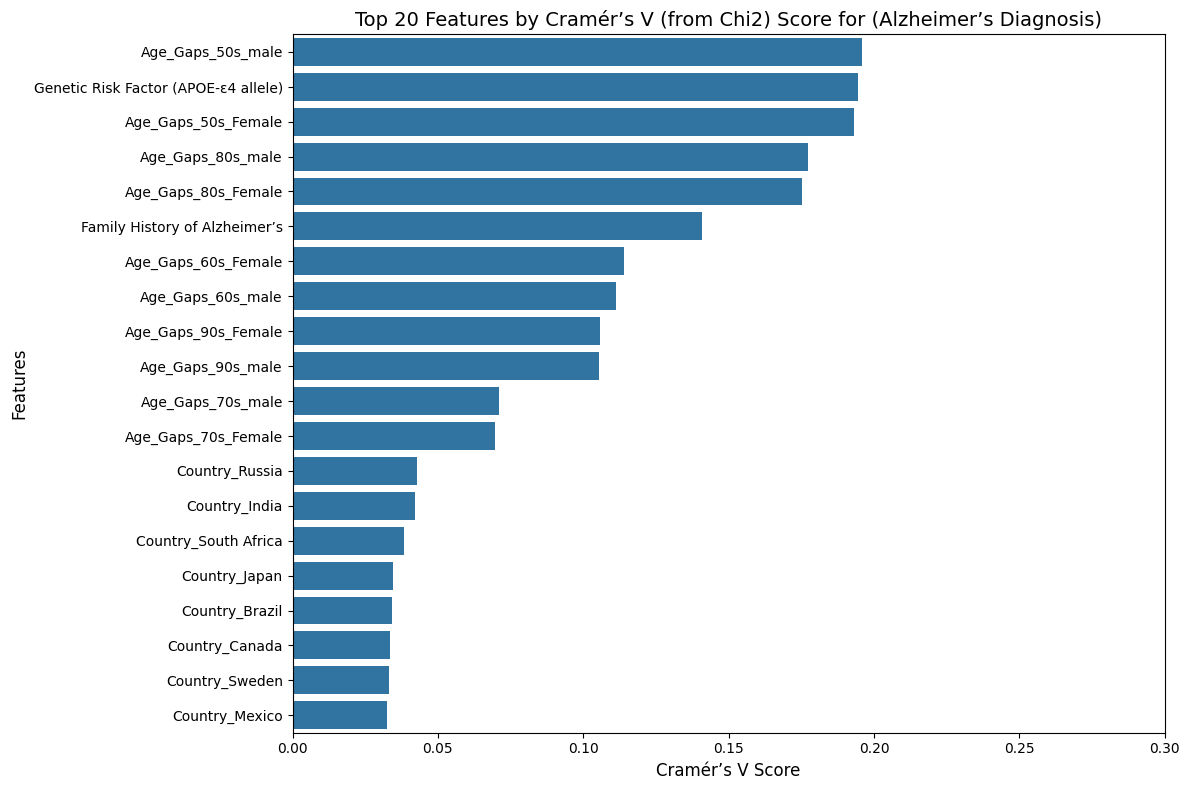

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# NaN değerleri kaldırıp ilk 10 sonucu alalım
df_plot = df_cramers.dropna().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='cramers_v', y='feature', data=df_plot)

plt.title("Top 20 Features by Cramér’s V (from Chi2) Score for (Alzheimer’s Diagnosis)", fontsize=14)
plt.xlabel("Cramér’s V Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xlim(0, 0.3)
plt.tight_layout()
plt.show()

100%|===================| 29686/29714 [02:58<00:00]          

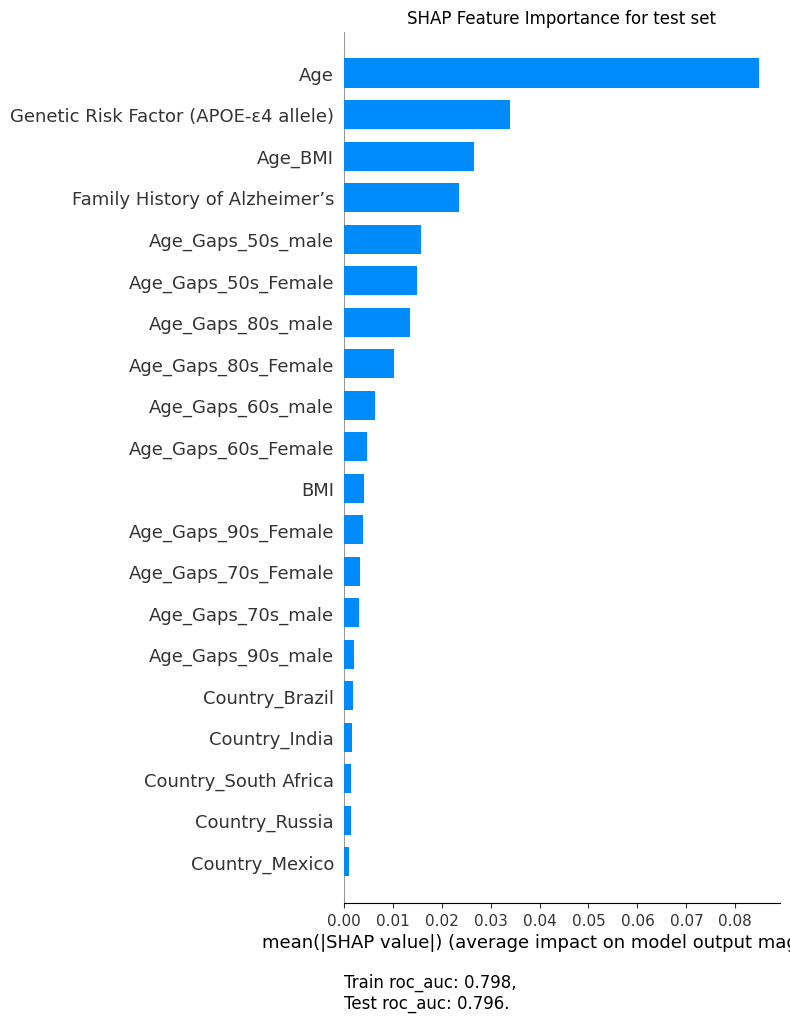

In [26]:
from probatus.interpret import ShapModelInterpreter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X,y, test_size=0.2,random_state=10
)
clf = RandomForestClassifier(n_estimators = 300, random_state=0,max_depth = 6)
clf = clf.fit(X_train, y_train)
shap_interpreter = ShapModelInterpreter(clf)
feature_importance = shap_interpreter.fit_compute(X_train, X_test, y_train, y_test, approximate=False,check_additivity=False)
ax = shap_interpreter.plot('importance')